# MNIST

La base de donnée MNIST est le "Hello World" du machine learning. On l'utilise couramment pour commencer l'apprentissage de réseaux de neurones puisque de très simples réseaux nous retourne d'excellents résultats.

In [7]:
# imports pour le projet
import torch
from torch import nn, optim
import torch.utils.data as data_utils
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

# "magic function" pour le Jupyter Notebook
%matplotlib inline

## Télécharger la base de données MNIST

La base de données MNIST est l'une des bases de données les plus commune utilisée pour la classification d'images. Elle est accessible à partir de plusieurs sources dont l'API (application programming interface) de Keras, de Tensorflow, de Pytorch, de Scikit-Learn...

In [8]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])
                                
# Download and load the data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## Un aperçu de nos données
Il nous est possible de voir à quoi ressemble nos données en utilisant pyplot provenant de matplotlib. On peut afficher sous forme de graphique en tons de gris les images du MNIST. 

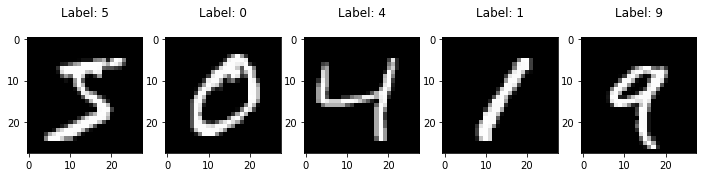

In [9]:
# définir la grosseur des graphiques
plt.figure(figsize=(12,4))

for index, (image, label) in enumerate(trainset):
    if index == 5:
        break
    
    # sélection de 5 images MNIST
    plt.subplot(1, 5, index + 1)
    
    # reshape l'image en 28 pixels par 28 pixels pour l'afficher 
    plt.imshow(np.reshape(image[0], (28,28)), cmap=plt.cm.gray)
    
    # affiche le label de l'image
    plt.title('Label: %i\n' % label)

## Définir le modèle et les opérations de validation

In [10]:
# Hyperparameters pour le réseau de neurones
input_size = 784 # 28*28
output_size = 10 # nombre de 0 à 9

class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_size, output_size)
        
        
    def forward(self, x):
        x = x.view(-1, input_size)
        return self.fc1(x)

    
    def validation(self, testloader, criterion):
        test_loss = 0
        accuracy = 0        
        for images, labels in testloader:
            output = model.forward(images)
            test_loss += criterion(output, labels).item()
            ps = torch.exp(output)
            equality = (labels.data == ps.max(dim=1)[1])
            accuracy += equality.type(torch.FloatTensor).mean()           
        return test_loss, accuracy

    
    def check_accuracy(self, testloader):    
        correct = 0
        total = 0
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels.long()).sum().item()
        print('Accuracy of the network: %d %%' % (100 * correct / total))

In [11]:
model = MNISTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [12]:
epochs = 10
steps = 0
print_every = 1000

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        
        loss = criterion(output, labels.long())
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
    with torch.no_grad():
        test_loss, accuracy = model.validation(testloader, criterion)

    print("Epoch: {}/{}.. ".format(e+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
          "Validation Loss: {:.3f}.. ".format(test_loss/len(testloader)),
          "Validation Accuracy: {:.3f}".format(accuracy/len(testloader)))            

Epoch: 1/10..  Training Loss: 1.930..  Validation Loss: 1.594..  Validation Accuracy: 0.755
Epoch: 2/10..  Training Loss: 1.402..  Validation Loss: 1.217..  Validation Accuracy: 0.812
Epoch: 3/10..  Training Loss: 1.127..  Validation Loss: 1.012..  Validation Accuracy: 0.828
Epoch: 4/10..  Training Loss: 0.967..  Validation Loss: 0.883..  Validation Accuracy: 0.840
Epoch: 5/10..  Training Loss: 0.864..  Validation Loss: 0.799..  Validation Accuracy: 0.847
Epoch: 6/10..  Training Loss: 0.791..  Validation Loss: 0.736..  Validation Accuracy: 0.853
Epoch: 7/10..  Training Loss: 0.738..  Validation Loss: 0.690..  Validation Accuracy: 0.858
Epoch: 8/10..  Training Loss: 0.696..  Validation Loss: 0.654..  Validation Accuracy: 0.863
Epoch: 9/10..  Training Loss: 0.663..  Validation Loss: 0.624..  Validation Accuracy: 0.866
Epoch: 10/10..  Training Loss: 0.636..  Validation Loss: 0.600..  Validation Accuracy: 0.867


In [13]:
model.check_accuracy(testloader)

Accuracy of the network: 86 %


In [14]:
def visualize_weights(model):
    for weights in model.fc1.weight:
        plt.imshow(weights.view(28, 28).data)
        plt.axis('off')
        plt.show()

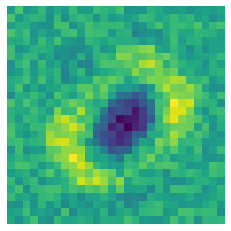

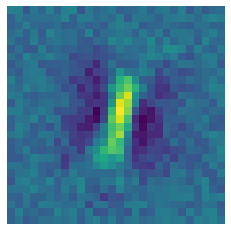

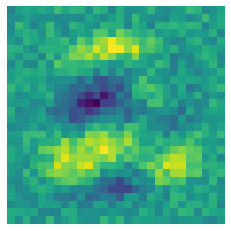

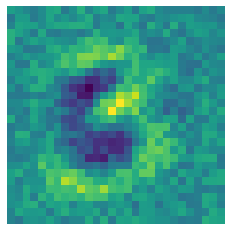

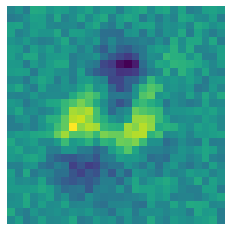

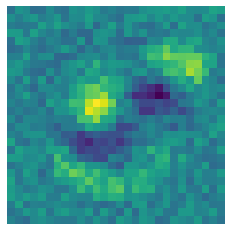

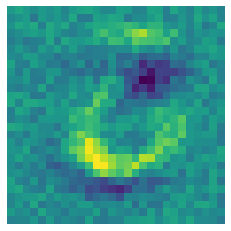

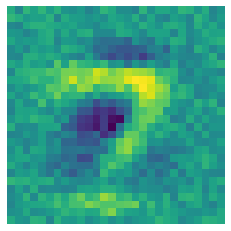

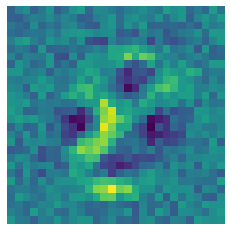

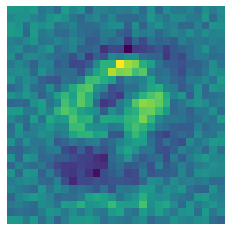

In [15]:
visualize_weights(model)

In [16]:
model.fc1.weight[1].view(28, 28).tolist()[12]

[-0.027336308732628822,
 0.022369690239429474,
 0.0007104827091097832,
 -0.01633809134364128,
 -0.00253622536547482,
 0.005850313697010279,
 -0.007097534369677305,
 0.0038583981804549694,
 -0.04012490063905716,
 -0.044874802231788635,
 -0.09077757596969604,
 -0.0809241235256195,
 -0.08565700054168701,
 0.0630585104227066,
 0.24014127254486084,
 0.2013162523508072,
 0.03723238781094551,
 -0.09605833142995834,
 -0.059925004839897156,
 -0.03631138801574707,
 -0.04025572910904884,
 -0.027296701446175575,
 -0.04045676812529564,
 0.015215504914522171,
 -0.002784914569929242,
 0.0007112672319635749,
 -0.02913590893149376,
 0.025558849796652794]